In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
data = np.loadtxt("ex2data1.txt",delimiter = ',')
X = data[:,[0,1]]
y = data[:,2]

In [3]:
X[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [4]:
y[:5]

array([0., 0., 0., 1., 1.])

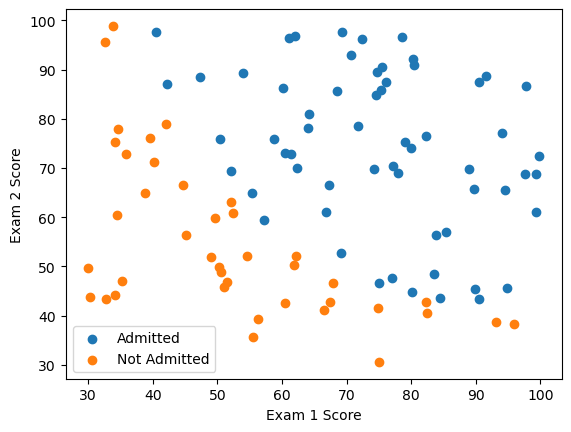

In [5]:
plt.figure()
plt.scatter(X[y==1][:,0],X[y==1][:,1],label="Admitted")
plt.scatter(X[y==0][:,0],X[y==0][:,1],label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.show()

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

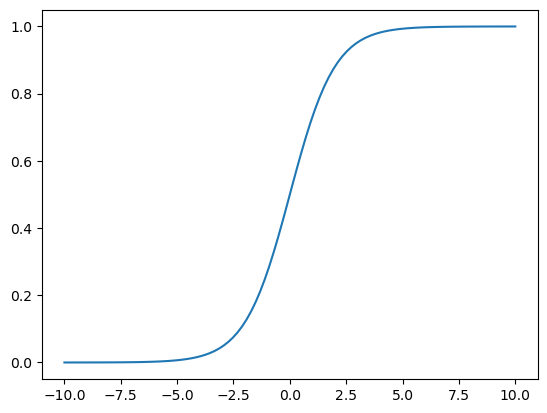

In [7]:
plt.plot()
X_plot = np.linspace(-10,10,100)
plt.plot(X_plot,sigmoid(X_plot))
plt.show()

In [8]:
def costFunction(theta,X,y):
    h = sigmoid(np.dot(X,theta))
    J = -(np.dot(y, np.log(h)) + np.dot(1 - y,np.log(1-h))) / X.shape[0]
    grad = np.dot(X.T, h - y) / X.shape[0]
    return J,grad

In [9]:
X_train = np.hstack((np.ones((X.shape[0],1)), X))
theta = np.array([0,0,0])
J,grad = costFunction(theta,X_train,y)
print(J)
print(grad)

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


In [10]:
X_train = np.hstack((np.ones((X.shape[0],1)), X))
theta = np.array([-24,0.2,0.2])
J,grad = costFunction(theta,X_train,y)
print(J)
print(grad)

0.21833019382659785
[0.04290299 2.56623412 2.64679737]


In [11]:
def cost(theta,X,y):
    h = sigmoid(np.dot(X,theta))
    J = -(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    return J
def gradient(theta,X,y):
    h = sigmoid(np.dot(X,theta))
    grad = np.dot(X.T,h-y)/X.shape[0]
    return grad
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta  = np.array([0,0,0])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y),method='Newton-CG', jac=gradient)
print(res.fun)
print(res.x)

0.20349771804248212
[-25.15081686   0.20614759   0.20138651]


In [18]:
def plotDecisionBoundary(theta,X,y):
    x_min, x_max = X[:, 0].min() - 1,X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),np.arange(y_min,y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0],1)),X_plot))
    y_plot = np.dot(X_plot,theta).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y==1][:,0],X[y==1][:,1],label="Admitted")
    plt.scatter(X[y==0][:,0],X[y==0][:,1],label="Not Admitted")
    plt.contour(xx,yy,y_plot,levels=[0])
    plt.xlabel("Exam 1 Score")
    plt.ylabel("Exam 2 Score")
    plt.legend()
    plt.show()


    

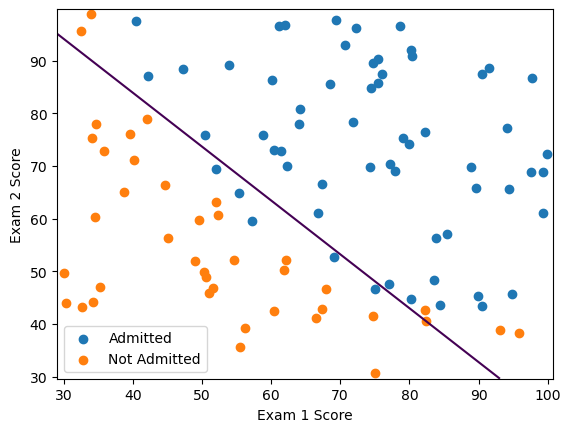

In [19]:
plotDecisionBoundary(res.x,X,y)

In [22]:
prob = sigmoid(np.dot(np.array([1,45,85]),res.x))
print(prob)

0.776203539644446


In [23]:
def predict(theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)),X))
    prob = sigmoid(np.dot(X_train,theta))
    return (prob>=0.5).astype(int)

In [25]:
np.mean(predict(res.x,X) == y)

0.89